<a href="https://colab.research.google.com/github/SwathiNagilla/Swathi_INFO5731_FALL2024/blob/main/Nagilla_Swathi_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.pipeline import make_pipeline

# Load the dataset
def data(file_path):
    # Read the .txt file
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Separate the Sentiment text  each line
    Sentiment= []
    texts = []

    for line in lines:
        # Split on the first space to separate sentiment and review text
        sentiment, text = line.strip().split(' ', 1)
        Sentiment.append(int(sentiment))  # Convert sentiment to integer
        texts.append(text)  # Keep the review text

    # Return as a pandas DataFrame
    return pd.DataFrame({'sentiment': Sentiment, 'text': texts})

# Load the train and test datasets from .txt files
train_data = data('stsa-test.txt')
test_data = data('stsa-train.txt')

# Split the train data into training and validation sets (80/20 split)
X_train = train_data['text']
y_train = train_data['sentiment']
X_test = test_data['text']
y_test = test_data['sentiment']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')

# Define the models you want to train
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Function to perform 10-fold cross-validation and evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Perform 10-fold cross-validation and print accuracy
    print(f"Training {model}...")
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"{model} Cross-validation Accuracy: {cv_results.mean():.4f}")

    # Train the model on the full training data
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')

    # Print the evaluation metrics
    print(f"{model} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    return model, accuracy, precision, recall, f1

# Split the training data into training and validation sets (80/20 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    pipeline = make_pipeline(vectorizer, model)
    _, accuracy, precision, recall, f1 = evaluate_model(pipeline, X_train_split, y_train_split, X_val_split, y_val_split)

    print(f"\n{model_name} performance on Validation Set:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("="*50)

# Evaluate the models on the test dataset
print("\nEvaluating on Test Data:")
for model_name, model in models.items():
    pipeline = make_pipeline(vectorizer, model)

    # Train the model using the pipeline (which includes vectorization)
    pipeline.fit(X_train, y_train)  # Train the model on the entire training set

    # Predict on test data using the pipeline (which includes vectorization)
    y_test_pred = pipeline.predict(X_test)  # Predict on test data

    # Calculate evaluation metrics on test data
    accuracy = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

    print(f"\nTest Data - {model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")



Training Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])...
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())]) Cross-validation Accuracy: 0.7431
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())]) - Accuracy: 0.7315, Precision: 0.7473, Recall: 0.7316, F1-Score: 0.7394

MultinomialNB performance on Validation Set:
Accuracy: 0.7315, Precision: 0.7473, Recall: 0.7316, F1-Score: 0.7394
Training Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('svc', SVC())])...
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('svc', SVC())]) Cross-validation Accuracy: 0.7226
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('svc', SVC())]) - Accu

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Dataset loaded successfully!
Preprocessing data...
Converting text to TF-IDF features...
Applying K-means...
K-means Silhouette Score: 0.17985738049282837
Applying DBSCAN...
DBSCAN Silhouette Score: 0.03005493600800468
Applying Hierarchical Clustering...
Hierarchical Clustering Silhouette Score: 0.1962183077877257
Generating Word2Vec Embeddings...
Applying K-means on Word2Vec embeddings...
Word2Vec K-means Silhouette Score: 0.5960977767296345
Generating BERT Embeddings...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Applying K-means on BERT embeddings...
BERT K-means Silhouette Score: 0.313664972782135
Visualizing Clusters...


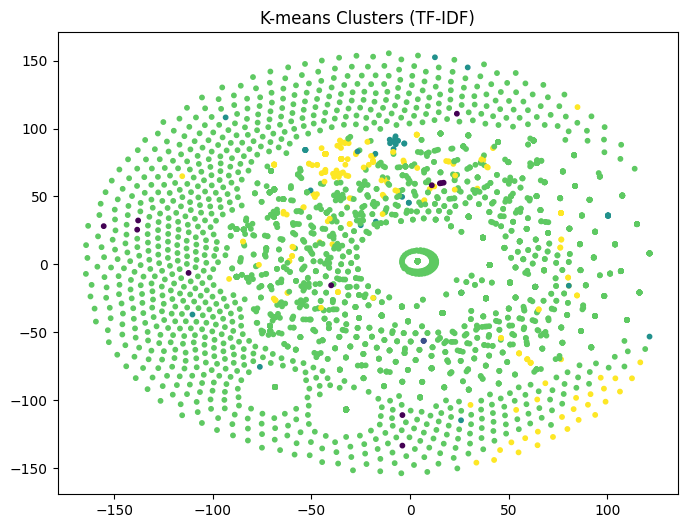

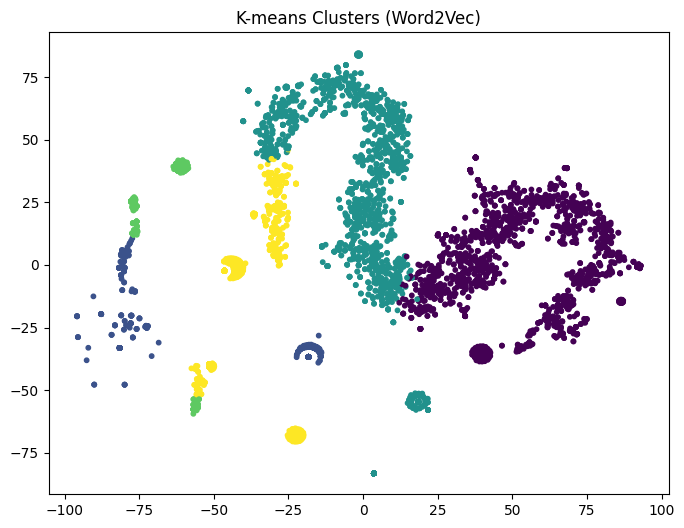

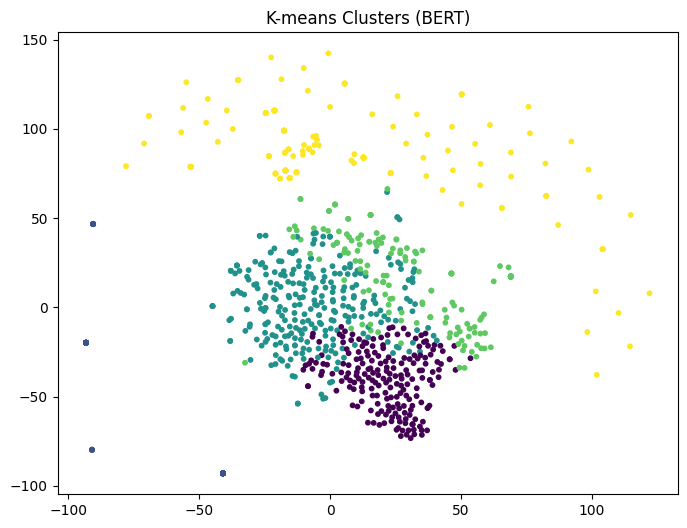

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import AutoTokenizer, AutoModel
import torch

# Load the dataset
file = 'Amazon_Unlocked_Mobile.csv'  # Ensure the file is in the current directory
try:
    # Load only necessary columns
    data = pd.read_csv(file, usecols=['Reviews'], on_bad_lines='skip', quoting=3)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Drop missing or empty reviews
print("Preprocessing data...")
data = data.dropna().reset_index(drop=True)
data['Reviews'] = data['Reviews'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)

# Use a subset of the data for faster processing
data = data.sample(5000, random_state=42)

# Convert text data to TF-IDF features
print("Converting text to TF-IDF features...")
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_tfidf = tfidf.fit_transform(data['Reviews'])

# K-means Clustering
print("Applying K-means...")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
kmeans_score = silhouette_score(X_tfidf, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_score}")

# DBSCAN Clustering
print("Applying DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)
try:
    dbscan_score = silhouette_score(X_tfidf, dbscan_labels, metric='cosine')
    print(f"DBSCAN Silhouette Score: {dbscan_score}")
except:
    print("DBSCAN clustering failed to compute silhouette score due to noisy clusters.")

# Hierarchical Clustering
print("Applying Hierarchical Clustering...")
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_tfidf.toarray())
hierarchical_score = silhouette_score(X_tfidf, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_score}")

# Word2Vec Clustering
print("Generating Word2Vec Embeddings...")
sentences = [review.split() for review in data['Reviews']]
w2v_model = Word2Vec(sentences, vector_size=50, window=5, min_count=2, workers=4, epochs=5)
X_w2v = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv] or [np.zeros(50)], axis=0) for words in sentences])

print("Applying K-means on Word2Vec embeddings...")
w2v_kmeans = KMeans(n_clusters=5, random_state=42)
w2v_labels = w2v_kmeans.fit_predict(X_w2v)
w2v_score = silhouette_score(X_w2v, w2v_labels)
print(f"Word2Vec K-means Silhouette Score: {w2v_score}")

# BERT Clustering
print("Generating BERT Embeddings...")
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

# Limit dataset size for BERT
bert_reviews = data['Reviews'][:1000]  # Use a smaller subset for BERT embeddings

# Function to get BERT embeddings
def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

bert_embeddings = get_bert_embeddings(bert_reviews.tolist())

print("Applying K-means on BERT embeddings...")
bert_kmeans = KMeans(n_clusters=5, random_state=42)
bert_labels = bert_kmeans.fit_predict(bert_embeddings)
bert_score = silhouette_score(bert_embeddings, bert_labels)
print(f"BERT K-means Silhouette Score: {bert_score}")

# Visualization with t-SNE
def plot_clusters(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.show()

print("Visualizing Clusters...")
plot_clusters(X_tfidf.toarray(), kmeans_labels, "K-means Clusters (TF-IDF)")
plot_clusters(X_w2v, w2v_labels, "K-means Clusters (Word2Vec)")
plot_clusters(bert_embeddings, bert_labels, "K-means Clusters (BERT)")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




The results suggest that feature and technique selection has a considerable impact on clustering performance. The K-means using TF-IDF features produces a low shadow score of 0.18, indicating that the clusters are not well defined. DBSCAN also performs poorly. The TF-IDF data is sparse and high-dimensional, which may explain the 0.03 score. Hierarchical clustering had a significantly higher score than K-means (0.19). Clustering utilizing Word2Vec embeddings increased dramatically, with K-means receiving a higher score of 0.60 because Word2Vec accurately caught the meaning. The BERT embedding also outperforms the TF-IDF, with a score of 0.31, since BERT better understands the context. Overall, Word2Vec performs best on this dataset.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

This project allowed me to study and evaluate clustering algorithms such as
K-means, DBSCAN, and Hierarchical Clustering utilizing various text representations
(TF-IDF, Word2Vec, and BERT). It highlighted the importance of feature selection
and algorithm selection, which helped me improve my practical skills in NLP and
clustering techniques.
